In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
from util import PROJECTS_FILE, FILTERED_FILE
#reads projects from Excel file
df = pd.read_excel(PROJECTS_FILE, keep_default_na=False)
print('Total repositories: ',len(df))

Total repositories:  251218


In [3]:
#Languages
nolanguages = df[df.languages==0]
nolanguages.to_excel("nolanguages-filter.xlsx") 
df.drop(df[df['languages'] == 0].index, inplace = True)
print('Total repositories after filtering repositories with "empty languages":',len(df))

Total repositories after filtering repositories with "empty languages": 147336


In [4]:
#Filters repositories wich name contains "courses", because these repositories do not belong to our scopus.
#This repositories are saved in a new file, and then deleted from the original dataframe
courses = df.loc[df.name.str.contains('course',case=False)]
courses.to_excel("courses-filter.xlsx") 
df.drop(df.loc[df.name.str.contains('course',case=False)].index, inplace=True )
print('Total repositories after filtering "courses":',len(df))

Total repositories after filtering "courses": 130480


In [5]:
cours = df.loc[df.name.str.contains('cours',case=False)]
cours.to_excel("cours-filter.xlsx") 
df.drop(df.loc[df.name.str.contains('cours',case=False)].index, inplace=True )
print('Total repositories after filtering "cours":',len(df))

Total repositories after filtering "cours": 130474


In [6]:
curso = df.loc[df.name.str.contains('curso',case=False)]
curso.to_excel("curso-filter.xlsx") 
df.drop(df.loc[df.name.str.contains('curso',case=False)].index, inplace=True )
print('Total repositories after filtering "curso":',len(df))

Total repositories after filtering "curso": 130205


In [7]:
cursos = df.loc[df.name.str.contains('cursos',case=False)]
cursos.to_excel("cursos-filter.xlsx") 
df.drop(df.loc[df.name.str.contains('cursos',case=False)].index, inplace=True )
print('Total repositories after filtering "cursos":',len(df))

Total repositories after filtering "cursos": 130205


In [8]:
emptycommits = df.loc[df['commits'] == '']
emptycommits.to_excel("emptycommits-filter.xlsx") 
df.drop(df[df['commits'] == ''].index, inplace = True)
print('Total repositories after filtering repositories with "empty commits":',len(df))


Total repositories after filtering repositories with "empty commits": 130205


In [9]:
nocontributors = df[df.contributors == 0]
nocontributors.to_excel("nocontributors-filter.xlsx") 
df.drop(df[df['contributors'] == 0].index, inplace = True)
print('Total repositories after filtering repositories with "empty contributors":',len(df))


Total repositories after filtering repositories with "empty contributors": 130159


In [10]:
#Counting how many repositories have each stargazer 
df.stargazers.value_counts(dropna=False).rename_axis('Stargazers').to_frame('Counts').to_excel("stargazers-valuecounts-filter.xlsx")

#data = df.stargazers.value_counts(dropna=False).rename_axis('Stargazers').to_frame('Counts')
#print (data)

In [11]:
#Counting how many contributors the repositories have 
df.contributors.value_counts(dropna=False).rename_axis('Contributors').to_frame('Counts').to_excel("contributors-valuecounts-filter.xlsx")


In [12]:
#Counting how many commits the repositories have 
df.commits.value_counts(dropna=False).rename_axis('Commits').to_frame('Counts').to_excel("commits-valuecounts-filter.xlsx")


In [13]:
#Counting how many languages the repositories have 
df.languages.value_counts(dropna=False).rename_axis('Languages').to_frame('Counts').to_excel("languages-valuecounts-filter.xlsx")


In [14]:
#Counting how many issues the repositories have 
df.issues.value_counts(dropna=False).rename_axis('Issues').to_frame('Counts').to_excel("issues-valuecounts-filter.xlsx")


In [15]:
#Counting how many branches the repositories have 
df.branches.value_counts(dropna=False).rename_axis('Branches').to_frame('Counts').to_excel("branches-valuecounts-filter.xlsx")


In [16]:
#Counting how many diskUsage the repositories have 
df.diskUsage.value_counts(dropna=False).rename_axis('DiskUsage').to_frame('Counts').to_excel("diskUsage-valuecounts-filter.xlsx")


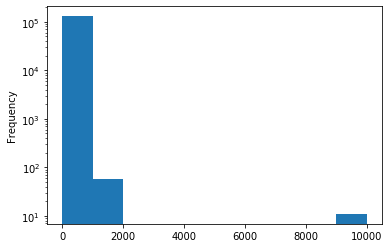

In [17]:
df["contributors"].plot(kind="hist", logy=True)

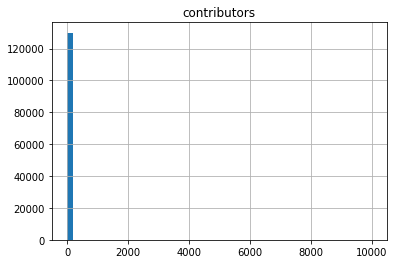

In [18]:
hist = df.hist(column=['contributors'], bins=50)

In [19]:
#Stargazers
df2=df[df.stargazers >0]
len(df2)

18975

In [20]:
#Contributors
df2 = df[df.contributors >= 2]
len(df2)

16802

In [21]:
df2 = df[df.contributors == 0]
df2
df2.to_csv('nocontributors.csv',index=True)

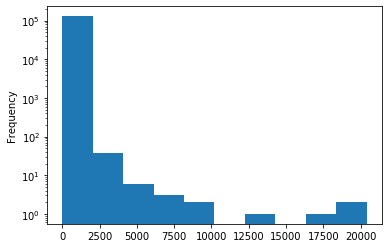

In [22]:
df["commits"].plot(kind="hist", logy=True)

In [23]:
#Commits
df2 = df[df.commits == 0]
len(df2)

0

In [24]:
df2 = df[df.commits >= 1]
len(df2)

130159

In [25]:
#Languages
df2 = df[df.languages==0]
len(df2)

0

In [26]:
df2 = df[df.languages > 1]
len(df2)

40918

In [27]:
df.primaryLanguage.value_counts()
#df.primaryLanguage.value_counts(dropna=False).to_frame('counts').to_excel("stargazers-valuecounts-filter.xlsx")


Jupyter Notebook    82628
Python              18746
HTML                11243
R                   10826
JavaScript           1245
                    ...  
PureScript              1
QML                     1
G-code                  1
IDL                     1
MQL5                    1
Name: primaryLanguage, Length: 130, dtype: int64

In [28]:
len(df.primaryLanguage.value_counts())

130

In [29]:
#filters repositories by language, keeping just the ones that use the top 10 languages in the corpus 
df2 = df.groupby('primaryLanguage').filter(lambda x: len(x) >= 18)
len(df2)

129775

In [30]:
pd.set_option('display.max_colwidth', -1) 
df

,owner,name,createdAt,pushedAt,isMirror,diskUsage,primaryLanguage,languages,contributors,watchers,stargazers,forks,issues,commits,pullRequests,branches,tags,releases,description
0,jakevdp,PythonDataScienceHandbook,2016-08-10 14:24:36,2021-11-12 19:40:00,False,34707,Jupyter Notebook,5,16,1738,31692,14160,145,234,164,6,0,0,Python Data Science Handbook: full text in Jupyter Notebooks
1,donnemartin,data-science-ipython-notebooks,2015-01-23 19:38:29,2021-11-04 20:19:10,False,49025,Python,4,12,1627,21825,6809,31,543,53,2,0,0,"Data science Python notebooks: Deep learning (TensorFlow, Theano, Caffe, Keras), scikit-learn, Kaggle, big data (Spark, Hadoop MapReduce, HDFS), matplotlib, pandas, NumPy, SciPy, Python essentials, AWS, and various command lines."
5,virgili0,Virgilio,2019-03-12 18:45:36,2021-10-19 06:22:27,False,35112,Jupyter Notebook,6,31,785,13189,2509,37,1363,123,12,0,0,Your new Mentor for Data Science E-Learning.
8,ricklamers,gridstudio,2019-07-23 13:56:41,2020-10-02 07:15:50,False,130620,JavaScript,9,10,329,8702,1500,128,202,16,5,0,0,Grid studio is a web-based application for data science with full integration of open source data science frameworks and languages.
9,goplus,gop,2015-12-12 01:21:39,2021-11-19 14:24:55,False,22158,Go,3,28,198,7706,497,393,1906,517,7,92,91,"GoPlus - The Go+ language for engineering, STEM education, and data science"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251206,DefinitelyMaybe,Kaggle,2018-04-01 23:21:34,2018-06-06 09:38:08,False,14698,Python,1,1,1,0,0,0,7,0,1,0,0,Early Days in the Data Science field
251207,viditmathur,Data-Science-and-ML,2018-06-06 10:07:38,2018-06-06 10:11:33,False,3806,Jupyter Notebook,2,1,1,0,0,0,2,0,1,0,0,
251209,andridns,ml-snippets,2018-06-05 09:17:28,2018-06-06 11:06:44,False,19,Python,1,1,0,0,0,0,20,0,1,0,0,my implementations of functions found in ML / data science pipeline in numpy
251211,jinsk44,data-science-workbook,2018-05-28 13:16:52,2018-06-06 12:06:07,False,48271,Jupyter Notebook,1,1,1,0,0,0,6,0,1,0,0,


In [31]:
df.describe()

,diskUsage,languages,contributors,watchers,stargazers,forks,issues,pullRequests,branches,tags,releases
count,1.301590e+05,130159.000000,130159.000000,130159.000000,130159.000000,130159.000000,130159.000000,130159.000000,130159.000000,130159.000000,130159.000000
mean,1.623928e+04,1.579599,6.454775,1.732450,2.654231,2.534907,0.287372,0.762252,1.314131,0.088400,0.060234
std,9.713855e+04,1.262176,99.192774,12.287543,133.291190,88.172313,11.068274,16.306476,3.322937,11.236564,10.959437
min,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,9.500000e+01,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.052000e+03,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,7.210000e+03,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.352860e+07,49.000000,10000.000000,2944.000000,31692.000000,14160.000000,3051.000000,4059.000000,735.000000,3869.000000,3866.000000


In [32]:
#saves filtered projetcts to Excel
#removes timezone from dates, since Excel does not know how to handle that
df.createdAt = pd.to_datetime(df.createdAt).dt.tz_localize(None) 
df.pushedAt = pd.to_datetime(df.pushedAt).dt.tz_localize(None)
df.to_excel(FILTERED_FILE, index=False)

In [33]:
#df.primaryLanguage.value_counts()
df.primaryLanguage.value_counts(dropna=False).rename_axis('PrimaryLanguage').to_frame('Counts').to_excel("PrimaryLanguage-valuecounts-filter.xlsx")


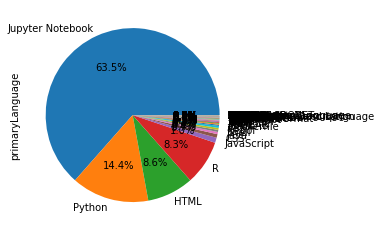

In [34]:
df.primaryLanguage.value_counts().plot(kind='pie', autopct='%1.1f%%')

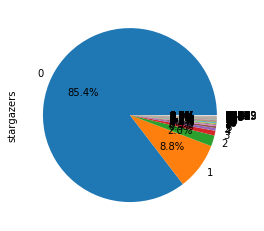

In [35]:
df.stargazers.value_counts().plot(kind='pie', autopct='%1.1f%%')

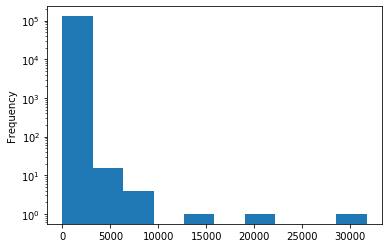

In [36]:
df["stargazers"].plot(kind="hist", logy=True)

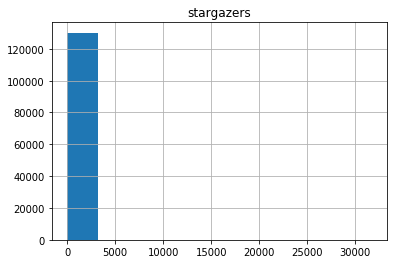

In [37]:
hist = df.hist(column=['stargazers'], bins=10)

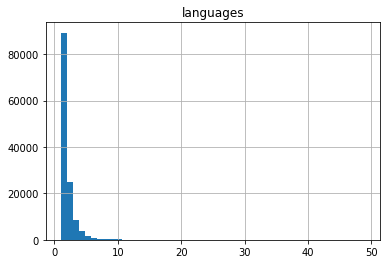

In [38]:
hist = df.hist(column=['languages'], bins=50)

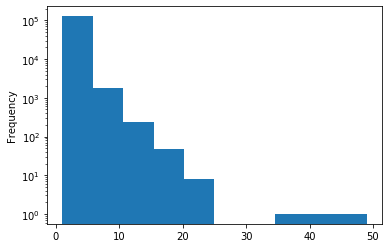

In [39]:
df["languages"].plot(kind="hist", logy=True)

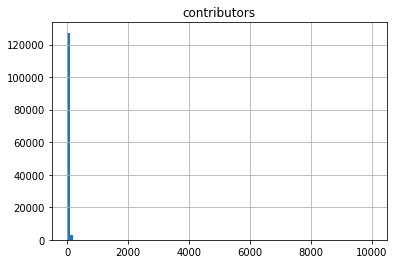

In [40]:
hist = df.hist(column=['contributors'], bins=100)

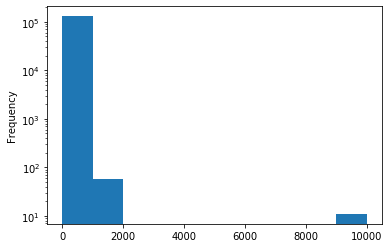

In [41]:
df["contributors"].plot(kind="hist", logy=True)

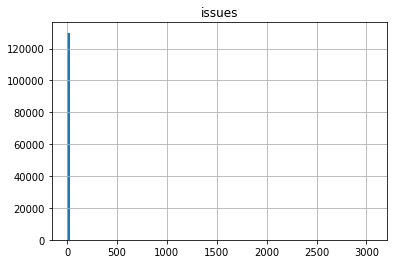

In [42]:
hist = df.hist(column=['issues'], bins=100)

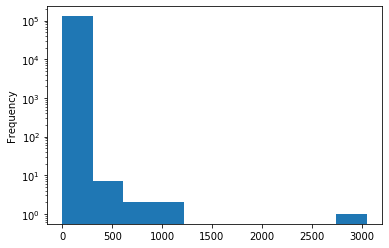

In [43]:
df["issues"].plot(kind="hist", logy=True)

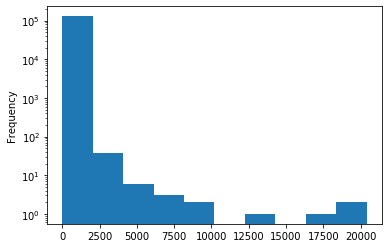

In [44]:
#hist = df.hist(column=['commits'], bins=100)
df["commits"].plot(kind="hist", logy=True)

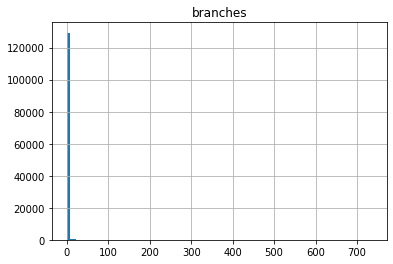

In [45]:
hist = df.hist(column=['branches'], bins=100)

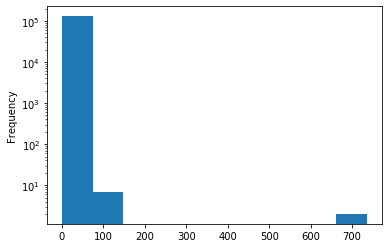

In [46]:
df["branches"].plot(kind="hist", logy=True)

Text(0.5, 0, 'KB')

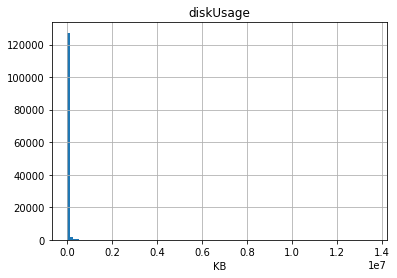

In [47]:
hist = df.hist(column=['diskUsage'], bins=100)
plt.xlabel("KB")

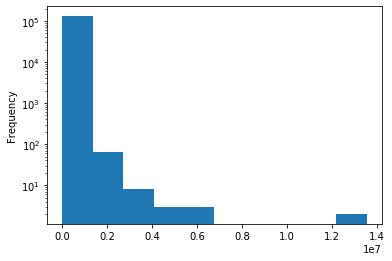

In [48]:
df["diskUsage"].plot(kind="hist", logy=True)

In [49]:
corr = df.drop('isMirror', axis=1).corr()
corr.style.background_gradient(cmap='Reds')

,diskUsage,languages,contributors,watchers,stargazers,forks,issues,pullRequests,branches,tags,releases
diskUsage,1,0.21496,-0.0020037,0.00485662,0.00832047,0.00515848,0.0259605,0.0350041,0.0361185,0.00449227,0.00204217
languages,0.21496,1,0.00643534,0.0212486,0.0336058,0.0173479,0.0640655,0.0876049,0.108067,0.0195838,0.0139005
contributors,-0.0020037,0.00643534,1,0.302733,0.0305642,0.177716,0.0226721,0.0183548,0.0169915,0.00800108,0.00649525
watchers,0.00485662,0.0212486,0.302733,1,0.636083,0.387917,0.104259,0.0994082,0.046286,0.0162897,0.0100124
stargazers,0.00832047,0.0336058,0.0305642,0.636083,1,0.533922,0.214544,0.187498,0.0845992,0.0318478,0.014698
forks,0.00515848,0.0173479,0.177716,0.387917,0.533922,1,0.069162,0.0734988,0.0218914,0.00498776,0.00233582
issues,0.0259605,0.0640655,0.0226721,0.104259,0.214544,0.069162,1,0.811903,0.546137,0.186964,0.0685769
pullRequests,0.0350041,0.0876049,0.0183548,0.0994082,0.187498,0.0734988,0.811903,1,0.642653,0.283453,0.176092
branches,0.0361185,0.108067,0.0169915,0.046286,0.0845992,0.0218914,0.546137,0.642653,1,0.182496,0.093179
tags,0.00449227,0.0195838,0.00800108,0.0162897,0.0318478,0.00498776,0.186964,0.283453,0.182496,1,0.986072
